In [23]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [24]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df['flower'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df[df.flower == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [29]:
df[df.flower == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [30]:
df[df.flower == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df.shape

(150, 5)

In [32]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

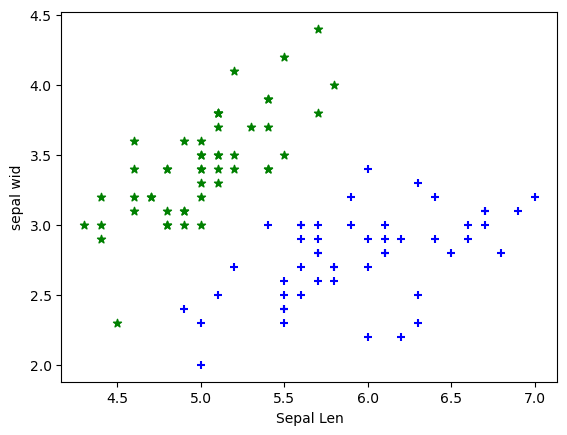

In [34]:
plt.xlabel('Sepal Len')
plt.ylabel('sepal wid')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker='+')

In [35]:
X = df.drop('flower', axis = 'columns')
y = df.flower

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
len(X_train)

120

In [38]:
len(y_train)

120

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [40]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
KNN.score(X_test, y_test)

0.9666666666666667

In [42]:
from sklearn.metrics import confusion_matrix
y_pred = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  6]])

Text(70.72222222222221, 0.5, 'Truth')

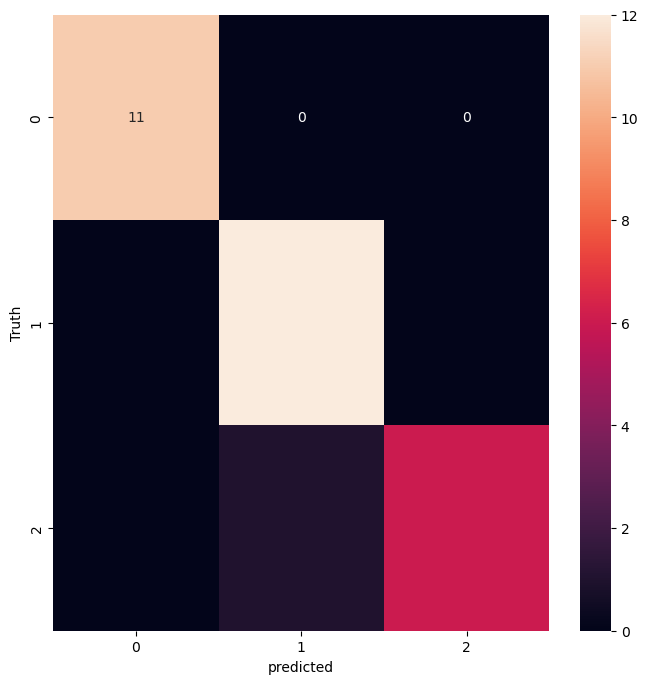

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
plt.figure(figsize=(8,8))
sbn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

